### **Relationship 1:Tire Compound Choice vs Lap Time** 10 points

Task: Investigate how different tire compounds (e.g., Soft, Medium, Hard) correlate with lap times throughout the race.

Objective: Identify which tire compounds lead to faster lap times and whether this varies depending on the stint or race phase.


### **Relationship 2: Starting Tire Type vs Final Classification** 10 points

Task: Explore how starting the race on different tire compounds (Hard, Soft, Medium) impacts the final classification.

Objective: Understand whether the initial tire choice plays a significant role in determining race outcomes.


### **Relationship 3: Number of Laps on a Compound vs Delta Time** 10 points

Task: Explore the relationship between the number of laps driven on a particular tire compound and the delta time (change in lap times) over those laps.

Objective: Understand how tire wear affects performance, particularly how lap times degrade as tires wear out during a stint.

### **Relationship 4: Number of Stops vs Final Position** 10 points

Task: Analyze the relationship between the number of pit stops a driver makes and their final position in the race.

Objective: Understand how the frequency of pit stops impacts race outcomes, particularly whether fewer or more stops lead to better results.

### **Relationship 5: Race Length vs Strategy** 10 points

Task: Examine how the total number of laps in each race influenced the pit stop strategy and tire choices for teams and drivers.

Objective: Understand how race length affects strategic decisions, particularly in terms of the number of stops and tire choices.

### **Bonus Question** 5 points

Examine the relationship between attributes you consider significant in a race of your choice. Explain your reasoning for selecting these attributes and whether the race holds particular relevance.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
folder_path = '/content/drive/MyDrive/formula-1'
os.chdir(folder_path)

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gc
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")


In [ ]:
black = '\033[30m'
red = '\033[31m'
green = '\033[32m'
yellow = '\033[33m'
blue = '\033[34m'
magenta = '\033[35m'
cyan = '\033[36m'
white = '\033[37m'
orange = "\033[38;5;208m"
bold = '\033[1m'
reset = '\033[0m'


In [ ]:
colors = {
    "Bold Red": "#FF0000",
    "Bold Green": "#00FF00",
    "Bold Magenta": "#FF00FF",

    "Bold Cyan": "#00FFFF",
    "Bold Blue": "#0000FF",
    "Bold Yellow": "#FFFF00",

    "Bold Orange": "#FFA500",
    "Bold Purple": "#800080",
    "Bold Pink": "#FFC0CB",
    "Bold Brown": "#A52A2A",
    "Bold Grey": "#808080",
    "Bold Black": "#000000",
      "Bold Neon Green": "#39FF14",
    "Bold Neon Pink": "#FF6EC7",
    "Bold Neon Blue": "#1B03A3",
    "Bold Neon Yellow": "#FFFF33",
    "Bold Neon Orange": "#FF5F1F",
    "Bold Dark Red": "#8B0000",
    "Bold Dark Green": "#006400",
    "Bold Dark Blue": "#00008B",
    "Bold Dark Orange": "#FF8C00",
    "Bold Dark Purple": "#4B0082",
    "Bold Dark Pink": "#FF1493",
    "Bold Dark Brown": "#654321",
    "Bold Dark Grey": "#A9A9A9",

    "Bold Light Yellow": "#FFFFE0",
     "Bold Light Blue": "#ADD8E6",
    "Bold Light Green": "#90EE90",
    "Bold Light Cyan": "#E0FFFF",
    "Bold Light Magenta": "#FFB6C1",
    "Bold Light Orange": "#FFDAB9",
    "Bold Light Purple": "#E6E6FA",
    "Bold Light Pink": "#FFDAB9",
    "Bold Light Brown": "#F5DEB3",

}

In [ ]:
def convert_to_timedelta(df , columns_name):
    for col in columns_name:
        df[col] = pd.to_timedelta(df[col])
    return df

def conver_to_datetime(df , columns_name):
    for col in columns_name:
        df[col] = pd.to_datetime(df[col])
    return df

def conver_deltatime_to_second (df , columns_name):
    for col in columns_name:
        df[f'{col}_in_sec'] = df[col].dt.total_seconds()
    return df

In [ ]:

path = 'ocean_data_challenge_F1_data/races_2024/'
for full_name in os.listdir(path):
    name = full_name.split(".")[0]
    df = pd.read_csv(path+full_name)
    print(f'{orange}{bold}{name} : {reset} {df.shape} ')
    for col in df.columns:
       print(f'{bold}{col} : {reset} |nnull: {yellow}{df[col].isnull().sum()} {reset} |nunique: {green}{df[col].nunique()} {reset} | {red}{df[col].dtype} {reset}|{blue}{list (df[col].head(10))} {reset} ' )


### **Relationship 1:Tire Compound Choice vs Lap Time**10 points

Task: Investigate how different tire compounds (e.g., Soft, Medium, Hard) correlate with lap times throughout the race.

Objective: Identify which tire compounds lead to faster lap times and whether this varies depending on the stint or race phase.

In [ ]:
lap_2024 = pd.read_csv('ocean_data_challenge_F1_data/races_2024/lap_2024.csv')
deltaTime_cols = ['Time', 'LapTime', 'Sector1Time', 'Sector2Time', 'Sector3Time' ,
                  'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
                  'LapStartTime', 'PitOutTime','PitInTime' ]

lap_2024= convert_to_timedelta(lap_2024 , deltaTime_cols)

lap_2024 = conver_deltatime_to_second (lap_2024 , deltaTime_cols)
print(f'{orange}{bold} lap_2024 : {reset} {lap_2024.shape} ')

for col in lap_2024.columns:
    print(f'{bold}{col} : {reset} |nnull: {yellow}{lap_2024[col].isnull().sum()} {reset} |nunique: {green}{lap_2024[col].nunique()} {reset} | {red}{lap_2024[col].dtype} {reset}|{blue}{list (lap_2024[col].head(5))} {reset} ' )

 lap_2024 :  (17123, 43) 
EventName :  |nnull: 0  |nunique: 15  | object |['Bahrain Grand Prix', 'Bahrain Grand Prix', 'Bahrain Grand Prix', 'Bahrain Grand Prix', 'Bahrain Grand Prix']  
Time :  |nnull: 0  |nunique: 17097  | timedelta64[ns] |[Timedelta('0 days 01:01:37.510000'), Timedelta('0 days 01:03:13.806000'), Timedelta('0 days 01:04:50.559000'), Timedelta('0 days 01:06:27.206000'), Timedelta('0 days 01:08:04.379000')]  
Driver :  |nnull: 0  |nunique: 21  | object |['VER', 'VER', 'VER', 'VER', 'VER']  
DriverNumber :  |nnull: 0  |nunique: 21  | int64 |[1, 1, 1, 1, 1]  
LapTime :  |nnull: 113  |nunique: 13266  | timedelta64[ns] |[Timedelta('0 days 00:01:37.284000'), Timedelta('0 days 00:01:36.296000'), Timedelta('0 days 00:01:36.753000'), Timedelta('0 days 00:01:36.647000'), Timedelta('0 days 00:01:37.173000')]  
LapNumber :  |nnull: 0  |nunique: 78  | float64 |[1.0, 2.0, 3.0, 4.0, 5.0]  
Stint :  |nnull: 0  |nunique: 5  | float64 |[1.0, 1.0, 1.0, 1.0, 1.0]  
PitOutTime :  |nnull: 

In [ ]:
grouped_data = lap_2024.groupby('Compound').agg({
            'LapNumber': lambda x : list(set(x)),
            'LapTime_in_sec': 'mean',
            'TyreLife' :  lambda x: np.count_nonzero(np.unique(x)),
            'Sector1Time_in_sec': 'mean',
            'Sector2Time_in_sec': 'mean',
            'Sector3Time_in_sec': 'mean',
        }, dropna=False).reset_index()
grouped_data

Compound                                          LapNumber  \
0          HARD  [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...   
1  INTERMEDIATE  [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...   
2        MEDIUM  [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...   
3          SOFT  [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...   
4           WET  [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...   

   LapTime_in_sec  TyreLife  Sector1Time_in_sec  Sector2Time_in_sec  \
0       90.953928        78           28.574239           33.272034   
1       96.184686        44           28.806552           32.208719   
2       91.417036        77           27.440446           33.482056   
3       90.151787        29           28.657811           35.617706   
4       99.379474        12           28.081882           30.916684   

   Sector3Time_in_sec  
0           27.306388  
1           34.963086  
2           27.177457  
3           25.841793  
4           38.916842

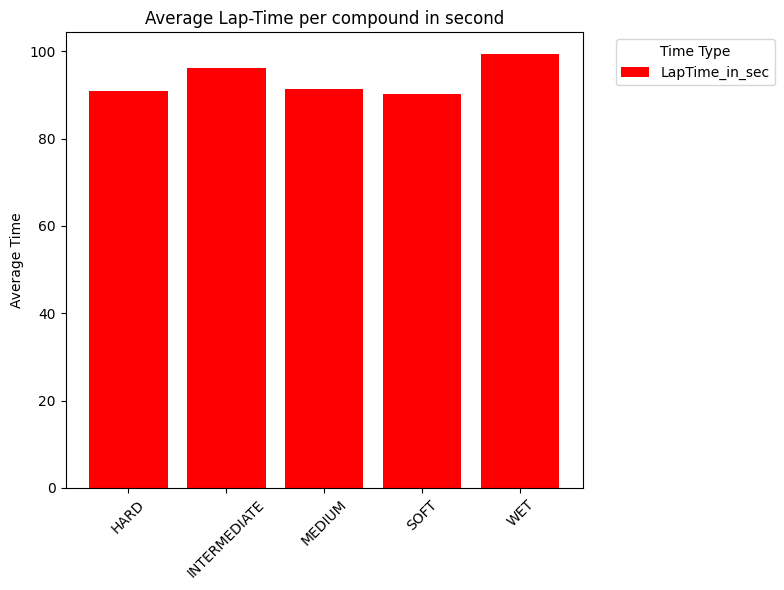

In [ ]:
plt.figure(figsize=(8,6))
plt.bar(grouped_data['Compound'], grouped_data['LapTime_in_sec'], label='LapTime_in_sec' , color='#FF0000')
plt.ylabel('Average Time')
plt.title('Average Lap-Time per compound in second')
plt.xticks(rotation=45)
plt.legend(title='Time Type',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


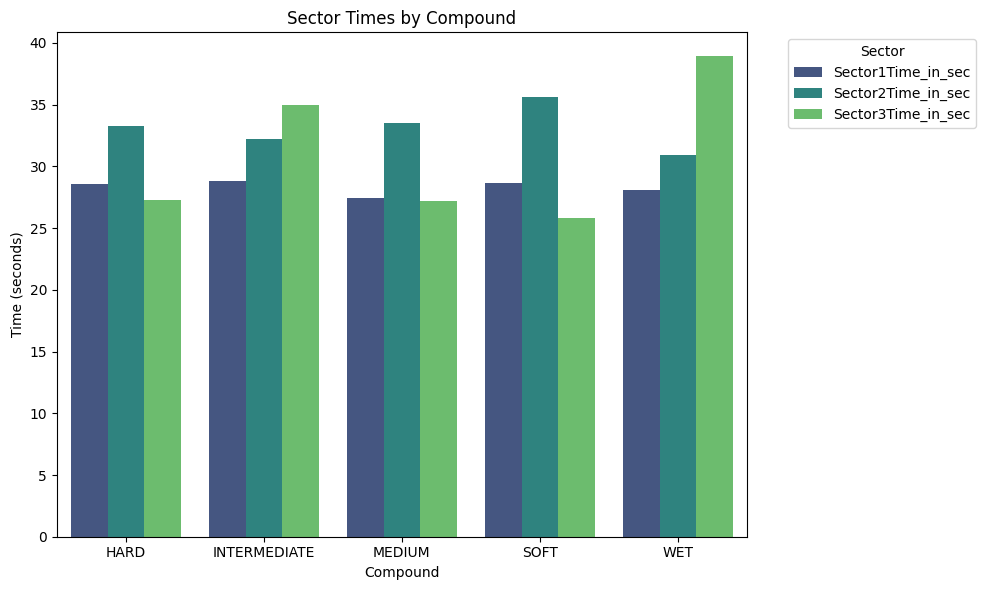

In [ ]:
melted_data = grouped_data.melt(id_vars='Compound', value_vars=['Sector1Time_in_sec', 'Sector2Time_in_sec', 'Sector3Time_in_sec'],
                        var_name='Sector', value_name='Time')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Compound', y='Time', hue='Sector', data=melted_data, palette='viridis')
plt.title('Sector Times by Compound')
plt.xlabel('Compound')
plt.ylabel('Time (seconds)')
plt.legend(title='Sector',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### **Relationship 2: Starting Tire Type vs Final Classification** 10 points

Task: Explore how starting the race on different tire compounds (Hard, Soft, Medium) impacts the final classification.

Objective: Understand whether the initial tire choice plays a significant role in determining race outcomes.



In [ ]:
lap_2024 = pd.read_csv('ocean_data_challenge_F1_data/races_2024/lap_2024.csv')
result_2024 = pd.read_csv('ocean_data_challenge_F1_data/races_2024/result_2024.csv')


result_2024['event_driverAbr'] = result_2024['EventName'] + '_' + result_2024['Abbreviation']
lap_2024['event_driverAbr'] = lap_2024['EventName'] + '_' + lap_2024['Driver']

res_lap_2024 = pd.merge(result_2024, lap_2024, on=['event_driverAbr'])
print(f'{orange}{bold} res_lap_2024 : {reset} {res_lap_2024.shape} ')

# for col in res_lap_2024.columns:
#     print(f'{bold}{col} : {reset} |nnull: {yellow}{res_lap_2024[col].isnull().sum()} {reset} |nunique: {green}{res_lap_2024[col].nunique()} {reset} | {red}{res_lap_2024[col].dtype} {reset}|{blue}{list (res_lap_2024[col].unique())} {reset} ' )

 res_lap_2024 :  (17123, 55) 


In [ ]:
res_lap_2024['Position_x'].unique()
res_lap_2024['ClassifiedPosition'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', 'R', 'W', 'D'],
      dtype=object)

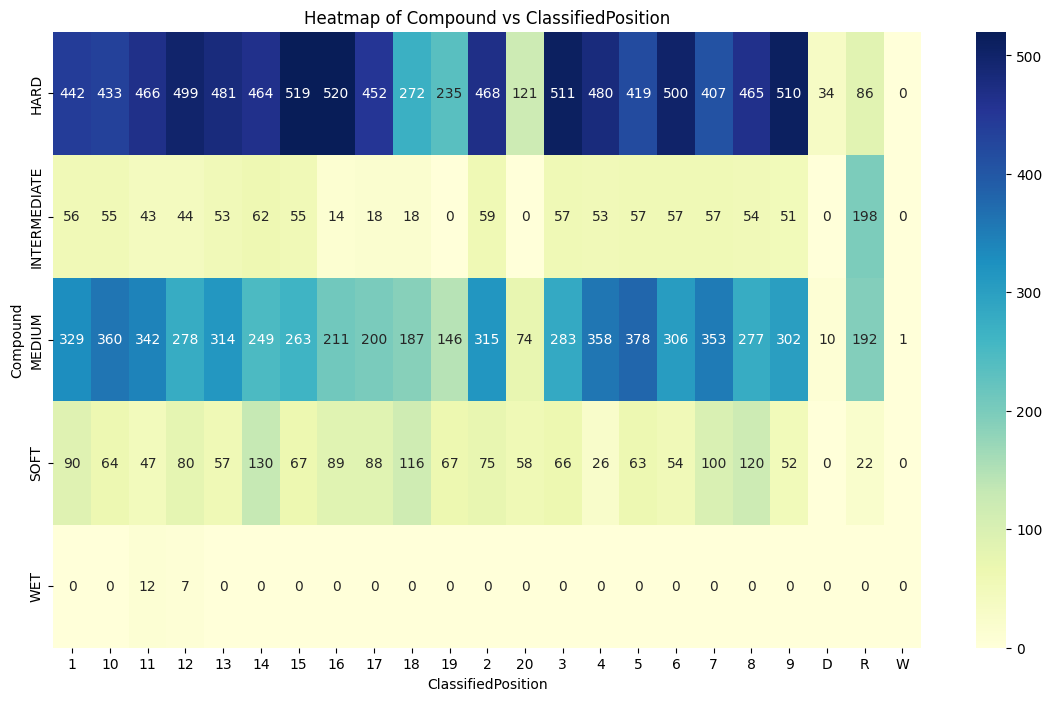

In [ ]:
contingency_table = pd.crosstab(res_lap_2024['Compound'], res_lap_2024['ClassifiedPosition'])
plt.figure(figsize=(14, 8))

sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap of Compound vs ClassifiedPosition')
plt.xlabel('ClassifiedPosition')
plt.ylabel('Compound')
plt.show()

In [ ]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2 Statistic: {chi2}, p-value: {p}")

Chi2 Statistic: 1802.9566141570142, p-value: 0.0


In [ ]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
cramers_v(res_lap_2024['Compound'], res_lap_2024['ClassifiedPosition'])



0.15825474093688835

In [ ]:
df = res_lap_2024[(res_lap_2024['LapNumber'] == 1) & (res_lap_2024['Stint'] == 1)]
df.shape

(299, 55)

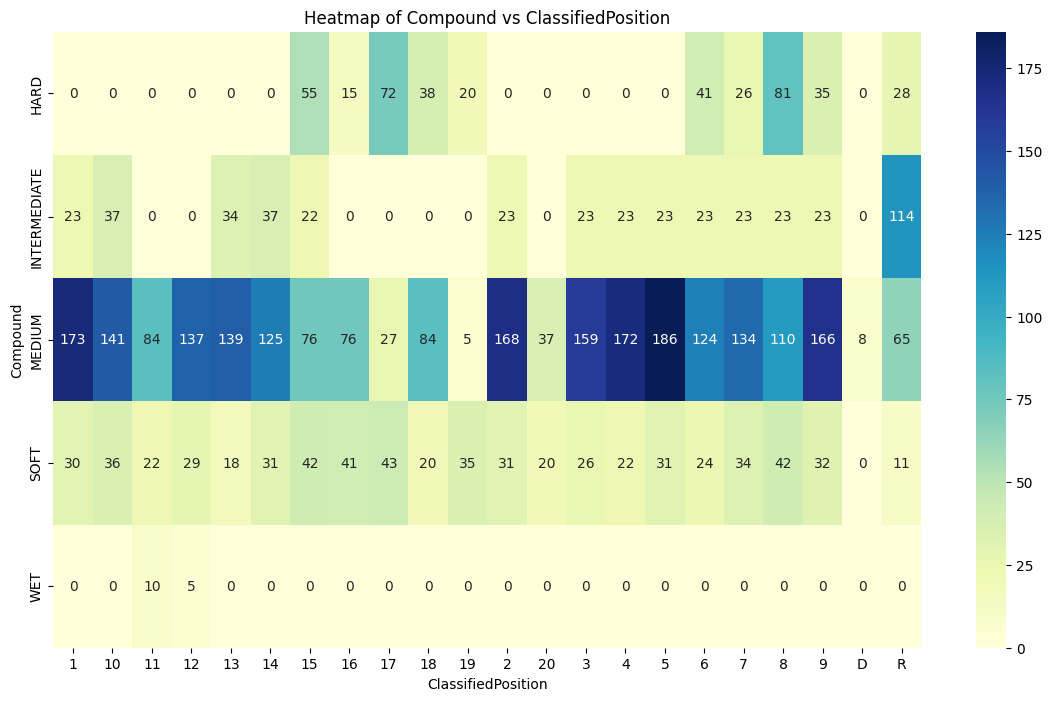

In [ ]:
lap_2024 = pd.read_csv('ocean_data_challenge_F1_data/races_2024/lap_2024.csv')
result_2024 = pd.read_csv('ocean_data_challenge_F1_data/races_2024/result_2024.csv')


result_2024['event_driverAbr'] = result_2024['EventName'] + '_' + result_2024['Abbreviation']
lap_2024['event_driverAbr'] = lap_2024['EventName'] + '_' + lap_2024['Driver']

res_lap_2024 = pd.merge(result_2024, lap_2024, on=['event_driverAbr'])
res_lap_2024=res_lap_2024[res_lap_2024['IsAccurate']==True]
df = res_lap_2024[(res_lap_2024['Stint'] == 1)]
contingency_table = pd.crosstab(df['Compound'], df['ClassifiedPosition'])

plt.figure(figsize=(14, 8))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap of Compound vs ClassifiedPosition')
plt.xlabel('ClassifiedPosition')
plt.ylabel('Compound')
plt.show()
# ------------------------------------------------------------------------------

 res_lap_2024 :  (15235, 55) 


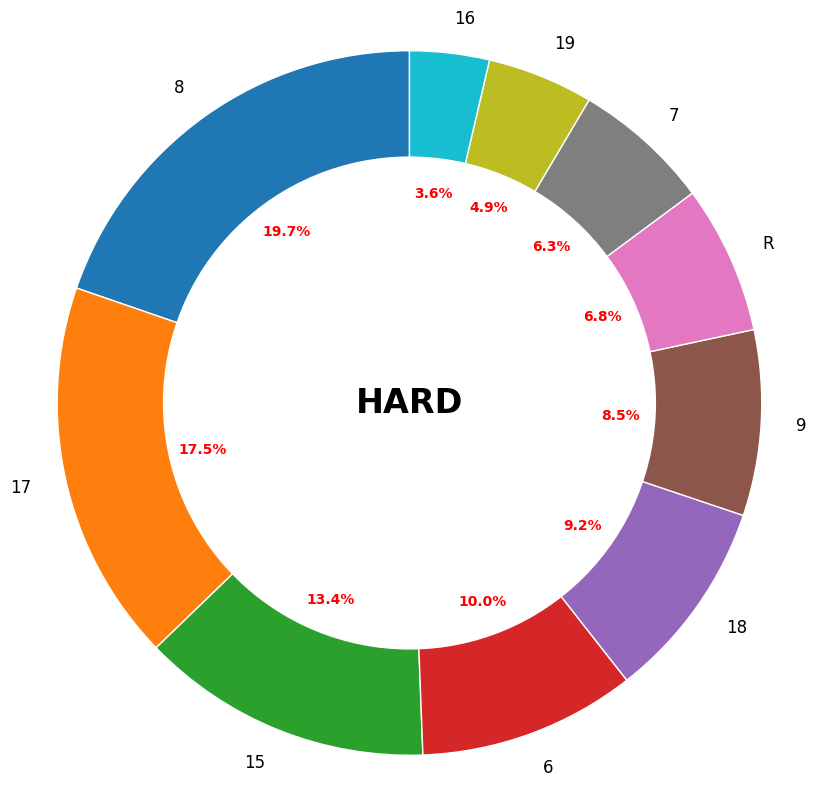

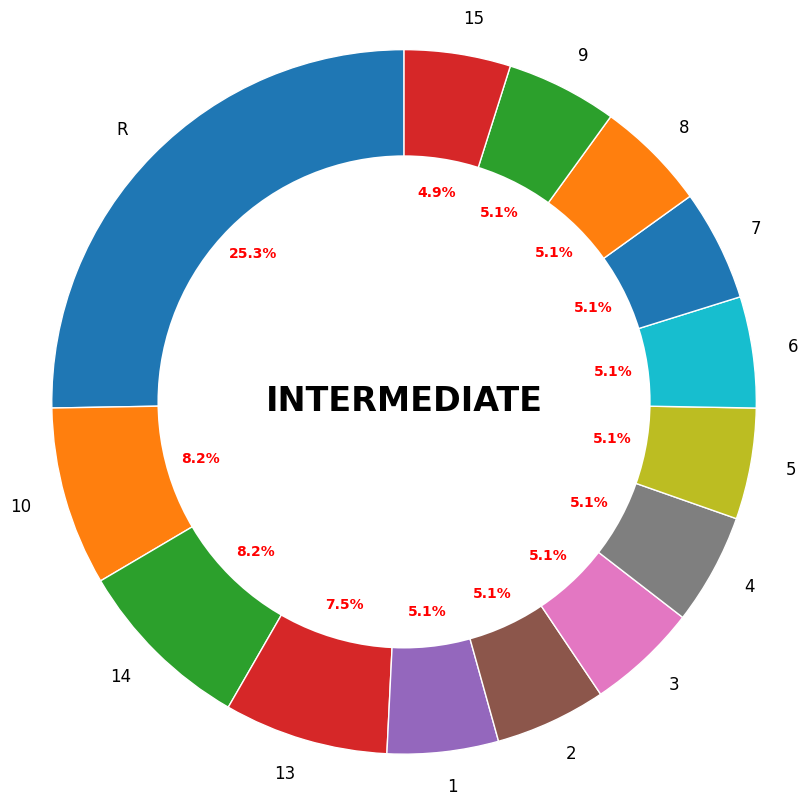

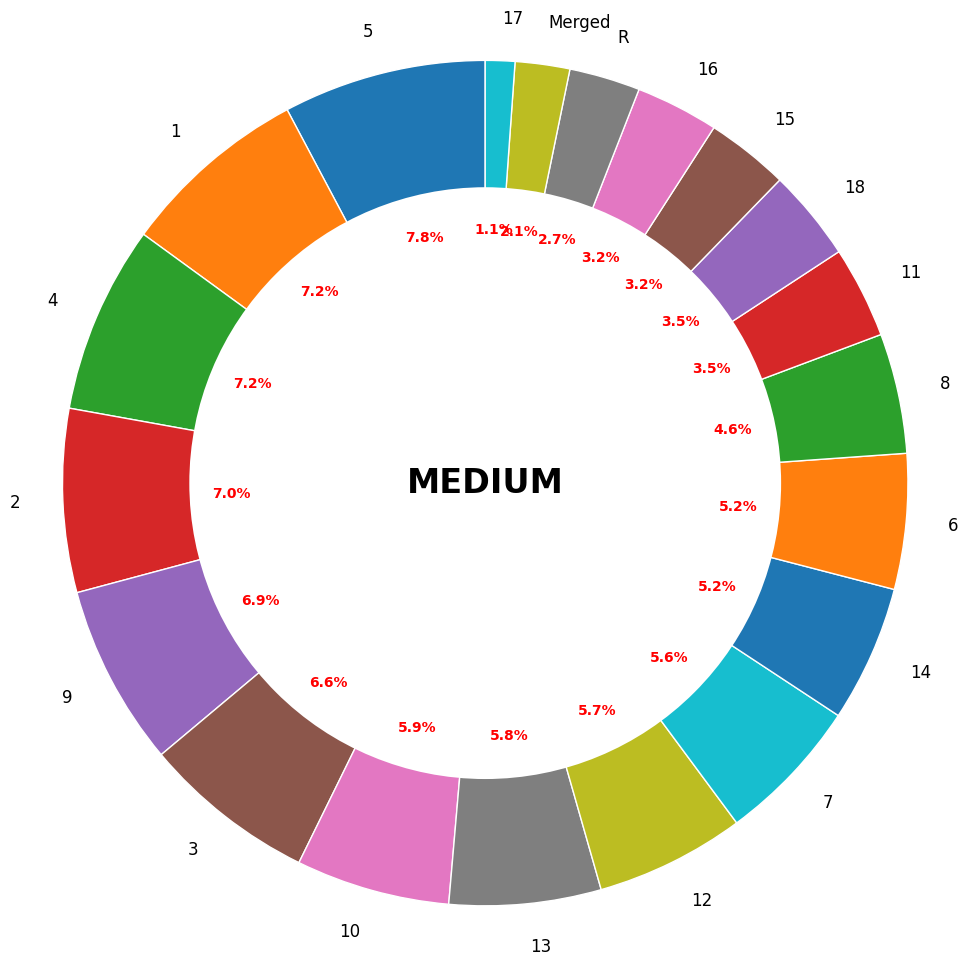

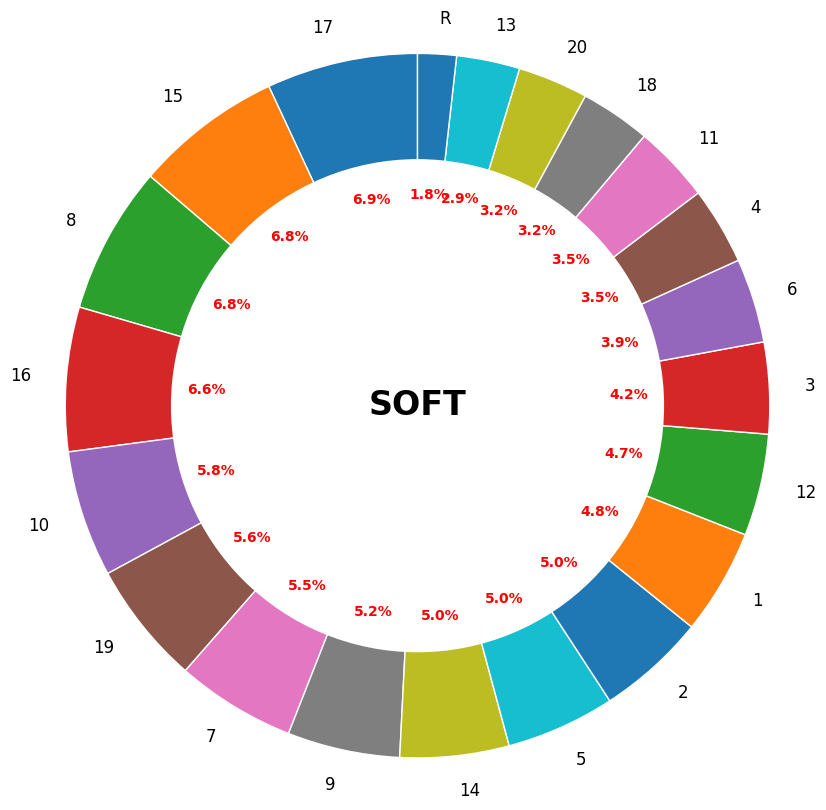

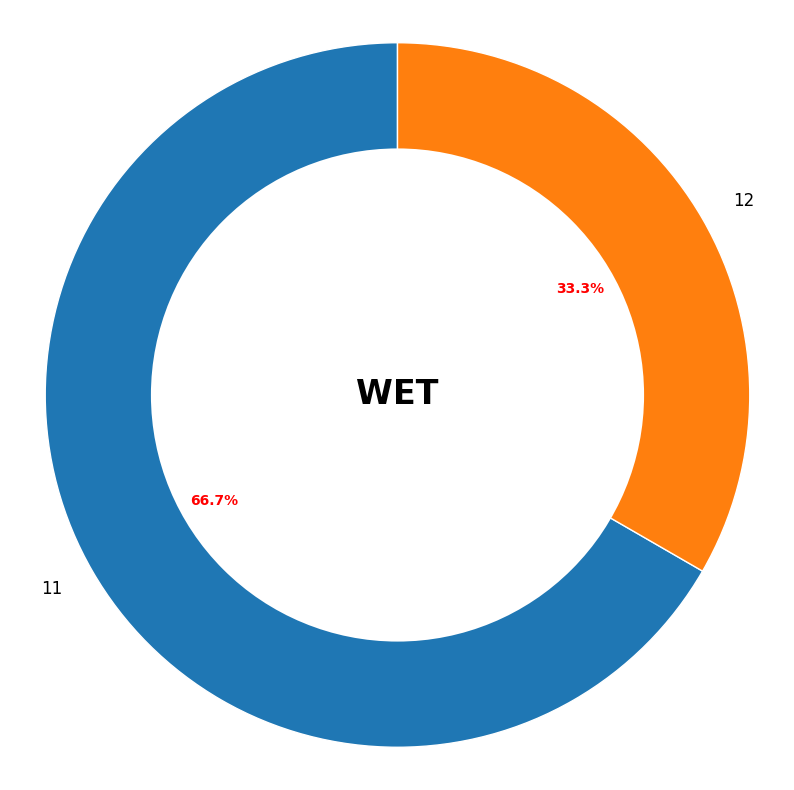

In [ ]:
lap_2024 = pd.read_csv('ocean_data_challenge_F1_data/races_2024/lap_2024.csv')
result_2024 = pd.read_csv('ocean_data_challenge_F1_data/races_2024/result_2024.csv')
result_2024['event_driverAbr'] = result_2024['EventName'] + '_' + result_2024['Abbreviation']
lap_2024['event_driverAbr'] = lap_2024['EventName'] + '_' + lap_2024['Driver']
res_lap_2024 = pd.merge(result_2024, lap_2024, on=['event_driverAbr'])
res_lap_2024=res_lap_2024[res_lap_2024['IsAccurate']==True]

print(f'{orange}{bold} res_lap_2024 : {reset} {res_lap_2024.shape} ')

def plot_donut_chart(positions, compound):

    if compound == 'MEDIUM':
        merged_positions = ['Merged' if pos in ['19', '20', 'D', 'W'] else pos for pos in positions]
        position_counts = pd.Series(merged_positions).value_counts(normalize=True)
        plt.figure(figsize=(12, 12))

    elif compound == 'HARD':
        merged_positions = ['Merged' if pos in ['5', '10', '11', '13', '14'] else pos for pos in positions]
        position_counts = pd.Series(merged_positions).value_counts(normalize=True)
        # print(position_counts)
        plt.figure(figsize=(10, 10))
    else:
        position_counts = pd.Series(positions).value_counts(normalize=True)
        plt.figure(figsize=(10, 10))
    wedges, texts, autotexts = plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%', startangle=90,  textprops={'fontsize': 12})
    for w in wedges:
        w.set_edgecolor('white')
    plt.setp(autotexts, size=10, weight='bold', color='red')
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.axis('equal')
    plt.text(0, 0, compound, ha='center', va='center', fontsize=24, weight='bold')
    plt.show()

df = res_lap_2024[res_lap_2024['Stint'] == 1]
grouped_df = df.groupby(['Compound']).agg({
    'ClassifiedPosition' : list,
    'Position_x' :list,
    'Driver' : list
}).reset_index()

for _, row in grouped_df.iterrows():
    compound = row['Compound']
    positions = row['ClassifiedPosition']
    flat_positions =[pos for sublist in positions for pos in sublist.split(',')]
    plot_donut_chart(flat_positions, compound)

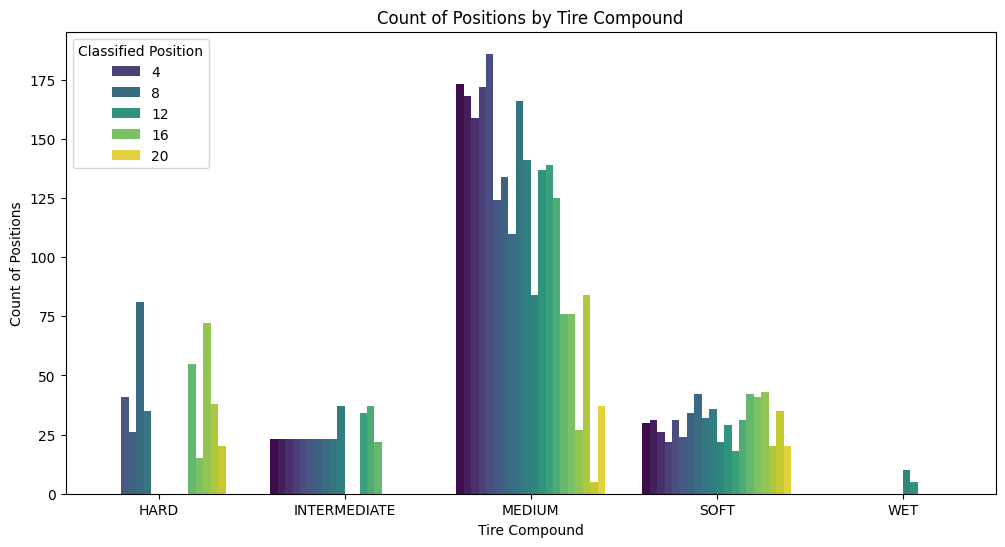

In [ ]:


grouped_df = df.groupby(['Compound']).agg({
    'ClassifiedPosition' : list,
    'Position_x' :list,
    'Driver' : list
}).reset_index()


# ----------------------------------count -plot ------------------------------------

# Explode the classified positions
grouped_df['ClassifiedPosition'] = grouped_df['ClassifiedPosition'].apply(lambda x: ','.join(x))
grouped_df['ClassifiedPosition'] = grouped_df['ClassifiedPosition'].str.split(',')
df_exploded = grouped_df.explode('ClassifiedPosition')

# Convert to numeric
df_exploded['ClassifiedPosition'] = pd.to_numeric(df_exploded['ClassifiedPosition'], errors='coerce')
df_exploded = df_exploded.dropna(subset=['ClassifiedPosition'])

plt.figure(figsize=(12, 6))
sns.countplot(data=df_exploded, x='Compound', hue='ClassifiedPosition', palette='viridis')
plt.title('Count of Positions by Tire Compound')
plt.xlabel('Tire Compound')
plt.ylabel('Count of Positions')
plt.xticks()
plt.legend(title='Classified Position', loc='upper left')
plt.show()


### **Relationship 3: Number of Laps on a Compound vs Delta Time** 10 points

Task: Explore the relationship between the number of laps driven on a particular tire compound and the delta time (change in lap times) over those laps.

Objective: Understand how tire wear affects performance, particularly how lap times degrade as tires wear out during a stint.

In [ ]:
lap_2024 = pd.read_csv('ocean_data_challenge_F1_data/races_2024/lap_2024.csv')
deltaTime_cols = ['Time', 'LapTime', 'Sector1Time', 'Sector2Time', 'Sector3Time' ,
                  'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
                  'LapStartTime', 'PitOutTime','PitInTime' ]

lap_2024= convert_to_timedelta(lap_2024 , deltaTime_cols)

lap_2024 = conver_deltatime_to_second (lap_2024 , deltaTime_cols)
print(f'{orange}{bold} lap_2024 : {reset} {lap_2024.shape} ')


 lap_2024 :  (17123, 43) 


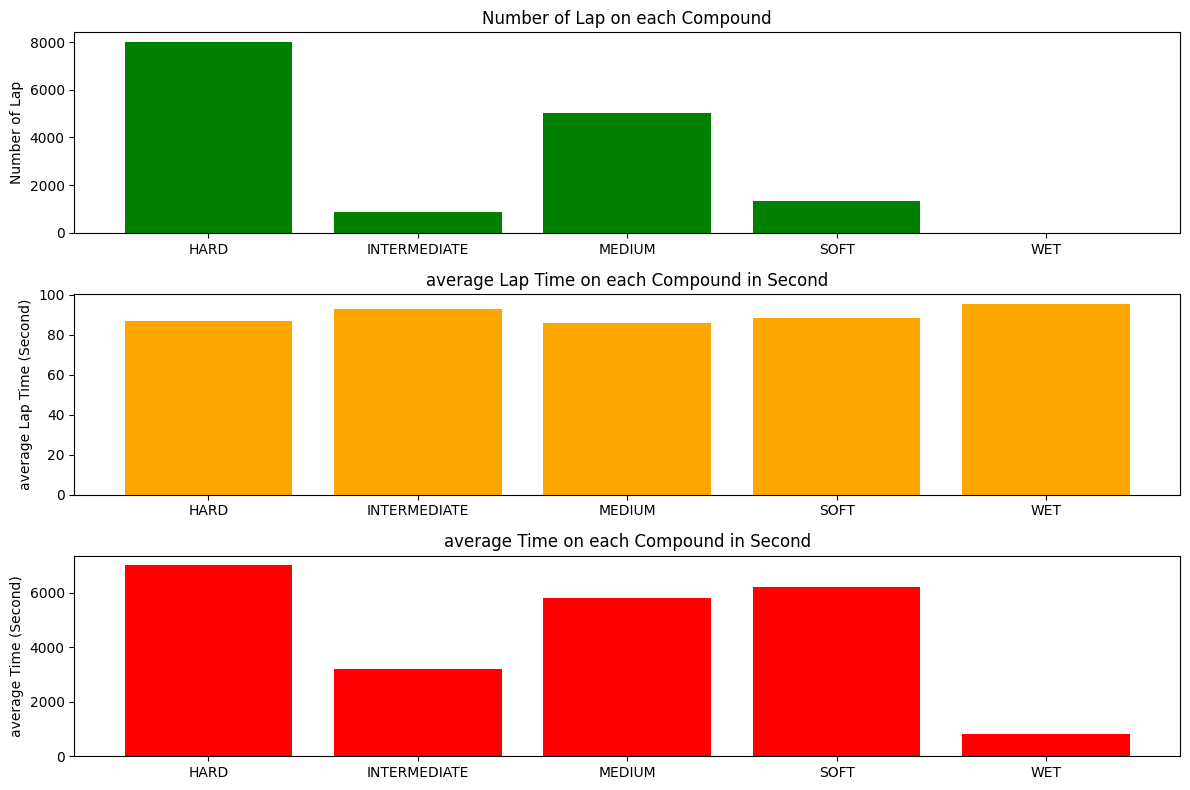

In [ ]:
lap_2024= lap_2024[lap_2024['IsAccurate']==True]

grouped_df = lap_2024.groupby(['Compound']).agg({
    'LapNumber' : 'count',
    'LapTime_in_sec' : 'mean',
    'Time_in_sec': 'mean',
}).reset_index()
grouped_df


# ------------------------------------------------------------------------
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 8))

# Plotting the first bar plot
axes[0].bar(grouped_df['Compound'].unique(),grouped_df['LapNumber'] , color='green')
axes[0].set_title('Number of Lap on each Compound')
axes[0].set_ylabel('Number of Lap')

# Plotting the second bar plot
axes[1].bar(grouped_df['Compound'].unique(),grouped_df['LapTime_in_sec'] , color='orange')
axes[1].set_title('average Lap Time on each Compound in Second')
axes[1].set_ylabel('average Lap Time (Second)')

axes[2].bar(grouped_df['Compound'].unique(),grouped_df['Time_in_sec'] , color='red')
axes[2].set_title('average Time on each Compound in Second')
axes[2].set_ylabel('average Time (Second)')

# Adjust layout
plt.tight_layout()
plt.show()

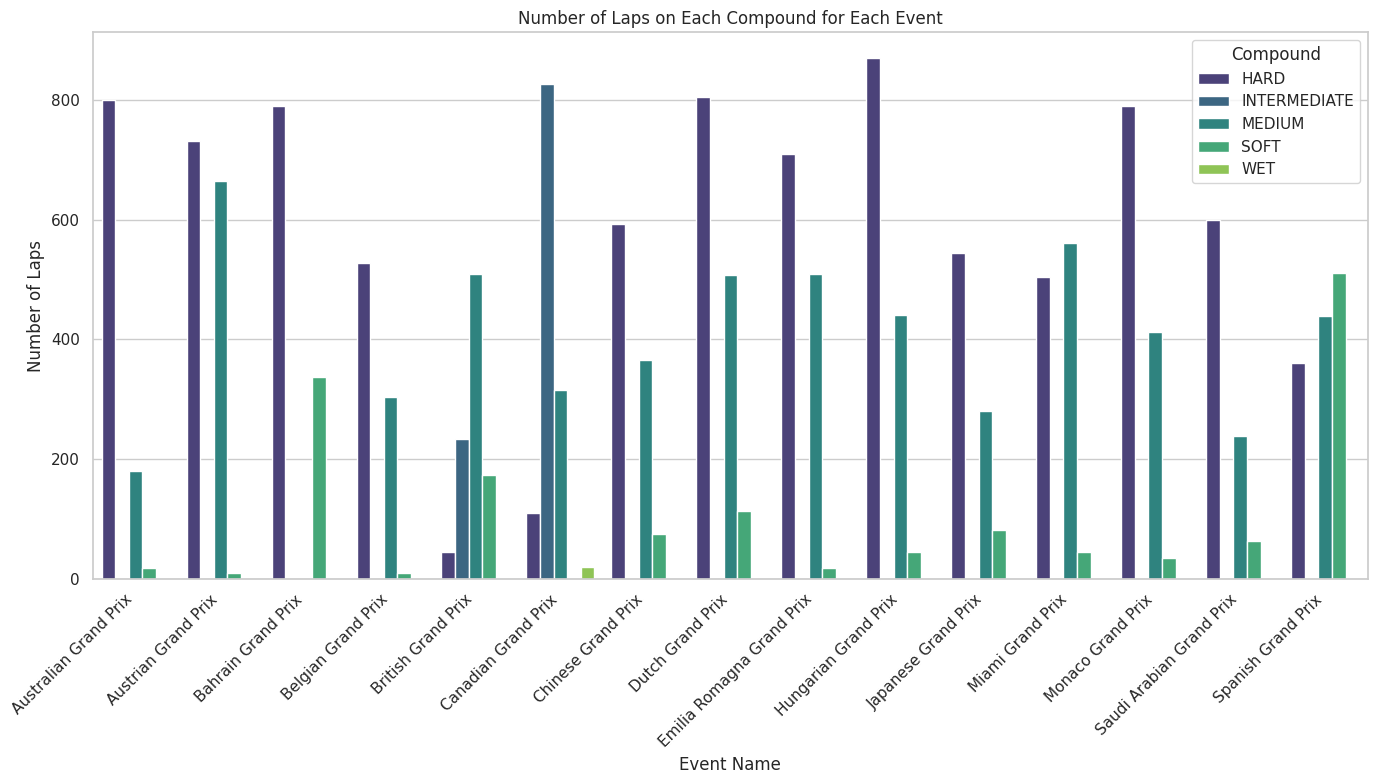

In [ ]:
grouped_df = lap_2024.groupby(['Compound', 'EventName']).agg({
    'LapNumber' : 'count',
    'LapTime_in_sec' : 'sum'
}).reset_index()
grouped_df

# Set the style for the plot
sns.set(style='whitegrid')

# Create a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='EventName', y='LapNumber', hue='Compound', data=grouped_df, palette='viridis')

plt.xticks(rotation=45, ha='right')

plt.title('Number of Laps on Each Compound for Each Event')
plt.xlabel('Event Name')
plt.ylabel('Number of Laps')
plt.legend(title='Compound')

plt.tight_layout()
plt.show()


### **Relationship 4: Number of Stops vs Final Position** 10 points

Task: Analyze the relationship between the number of pit stops a driver makes and their final position in the race.

Objective: Understand how the frequency of pit stops impacts race outcomes, particularly whether fewer or more stops lead to better results.


In [ ]:
lap_2024 = pd.read_csv('ocean_data_challenge_F1_data/races_2024/lap_2024.csv')
result_2024 = pd.read_csv('ocean_data_challenge_F1_data/races_2024/result_2024.csv')


result_2024['event_driverAbr'] = result_2024['EventName'] + '_' + result_2024['Abbreviation']
lap_2024['event_driverAbr'] = lap_2024['EventName'] + '_' + lap_2024['Driver']

res_lap_2024 = pd.merge(result_2024, lap_2024, on=['event_driverAbr'])
print(f'{orange}{bold} res_lap_2024 : {reset} {res_lap_2024.shape} ')


 res_lap_2024 :  (17123, 55) 


(15235, 55)
correlation between number of Pit-Stops and final position based on driver  : 0.09702808653398266


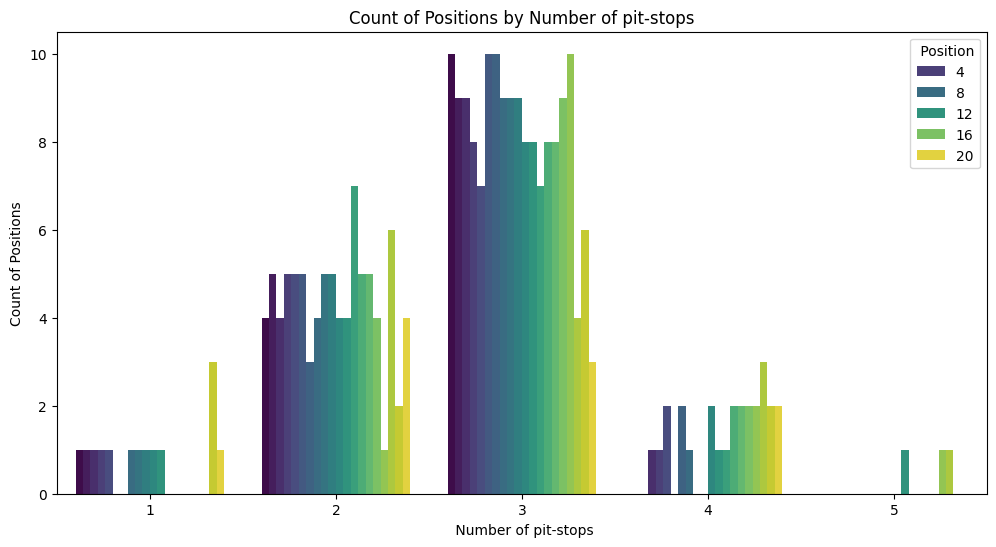

In [ ]:
df = res_lap_2024[res_lap_2024['IsAccurate'] == True]
print(df.shape)
grouped_df = df.groupby(['Driver', 'EventName_x' ]).agg({
    'Stint' : lambda x: np.count_nonzero(np.unique(x)),
    'ClassifiedPosition' : 'first',
    'Position_x' : 'first',
}).reset_index()
corr_driver = grouped_df['Stint'].corr(grouped_df['Position_x'])
print (f'{yellow}correlation between number of Pit-Stops and final position based on driver {reset} : {corr_driver}')

grouped_df2 = grouped_df.groupby('Stint').agg({
    'Position_x' : list,
}).reset_index()

df_exploded = grouped_df2.explode('Position_x')


plt.figure(figsize=(12, 6))
sns.countplot(data=df_exploded, x='Stint', hue='Position_x', palette='viridis')
plt.title('Count of Positions by Number of pit-stops')
plt.xlabel(' Number of pit-stops')
plt.ylabel('Count of Positions')
plt.xticks()
plt.legend(title=' Position',  loc='upper right')
plt.show()



### **Relationship 5: Race Length vs Strategy** 10 points

Task: Examine how the total number of laps in each race influenced the pit stop strategy and tire choices for teams and drivers.

Objective: Understand how race length affects strategic decisions, particularly in terms of the number of stops and tire choices.

In [ ]:
lap_2024 = pd.read_csv('ocean_data_challenge_F1_data/races_2024/lap_2024.csv')
result_2024 = pd.read_csv('ocean_data_challenge_F1_data/races_2024/result_2024.csv')


result_2024['event_driverAbr'] = result_2024['EventName'] + '_' + result_2024['Abbreviation']
lap_2024['event_driverAbr'] = lap_2024['EventName'] + '_' + lap_2024['Driver']

res_lap_2024 = pd.merge(result_2024, lap_2024, on=['event_driverAbr'])
print(f'{orange}{bold} res_lap_2024 : {reset} {res_lap_2024.shape} ')

for col in res_lap_2024.columns:
    print(f'{bold}{col} : {reset} |nnull: {yellow}{res_lap_2024[col].isnull().sum()} {reset} |nunique: {green}{res_lap_2024[col].nunique()} {reset} | {red}{res_lap_2024[col].dtype} {reset}|{blue}{list (res_lap_2024[col].unique())} {reset} ' )

 res_lap_2024 :  (17123, 55) 
EventName_x :  |nnull: 0  |nunique: 15  | object |['Bahrain Grand Prix', 'Saudi Arabian Grand Prix', 'Australian Grand Prix', 'Japanese Grand Prix', 'Chinese Grand Prix', 'Miami Grand Prix', 'Emilia Romagna Grand Prix', 'Monaco Grand Prix', 'Canadian Grand Prix', 'Spanish Grand Prix', 'Austrian Grand Prix', 'British Grand Prix', 'Hungarian Grand Prix', 'Belgian Grand Prix', 'Dutch Grand Prix']  
DriverNumber_x :  |nnull: 0  |nunique: 21  | int64 |[1, 11, 55, 16, 63, 4, 44, 81, 14, 18, 24, 20, 3, 22, 23, 27, 31, 10, 77, 2, 38]  
BroadcastName :  |nnull: 0  |nunique: 21  | object |['M VERSTAPPEN', 'S PEREZ', 'C SAINZ', 'C LECLERC', 'G RUSSELL', 'L NORRIS', 'L HAMILTON', 'O PIASTRI', 'F ALONSO', 'L STROLL', 'G ZHOU', 'K MAGNUSSEN', 'D RICCIARDO', 'Y TSUNODA', 'A ALBON', 'N HULKENBERG', 'E OCON', 'P GASLY', 'V BOTTAS', 'L SARGEANT', 'O BEARMAN']  
Abbreviation :  |nnull: 0  |nunique: 21  | object |['VER', 'PER', 'SAI', 'LEC', 'RUS', 'NOR', 'HAM', 'PIA', 'ALO',

In [ ]:
lap_2024 =lap_2024[lap_2024['IsAccurate'] == True]

df = lap_2024.groupby(['EventName', 'Driver' ,'Stint']).agg({
    'Compound' :  lambda x : list(set(x)),
    'LapNumber' : 'max',

}).reset_index()

df2 = df.groupby(['EventName', 'Driver' ,]).agg({
    'Compound' :  lambda x: sum(x, []),
    'Stint' : 'max',
    'LapNumber' : 'max',

}).reset_index()
df2

df3 = df2.groupby(['EventName']).agg({
    'Compound' :  lambda x: dict(Counter(sum(x, []))),
    'Stint' : 'mean',
    'LapNumber' : 'max',

}).reset_index()
df3 ['event_totla_lap'] = df3['EventName'] + '_'+ (df3['LapNumber']).astype(int).astype(str)
df3 = df3.sort_values(by='LapNumber', ascending=True)

df3

EventName  \
3          Belgian Grand Prix   
13   Saudi Arabian Grand Prix   
4          British Grand Prix   
10        Japanese Grand Prix   
6          Chinese Grand Prix   
0       Australian Grand Prix   
2          Bahrain Grand Prix   
11           Miami Grand Prix   
8   Emilia Romagna Grand Prix   
14         Spanish Grand Prix   
5         Canadian Grand Prix   
9        Hungarian Grand Prix   
1         Austrian Grand Prix   
7            Dutch Grand Prix   
12          Monaco Grand Prix   

                                             Compound     Stint  LapNumber  \
3               {'MEDIUM': 25, 'HARD': 27, 'SOFT': 2}  2.700000       44.0   
13              {'MEDIUM': 17, 'HARD': 15, 'SOFT': 6}  2.000000       50.0   
4   {'MEDIUM': 24, 'INTERMEDIATE': 22, 'SOFT': 14,...  3.368421       52.0   
10              {'SOFT': 8, 'MEDIUM': 17, 'HARD': 28}  3.944444       53.0   
6               {'MEDIUM': 27, 'HARD': 25, 'SOFT': 6}  2.950000       56.0   
0               {'MEDIUM': 16, 'HARD': 36, 'SOFT': 3}  2.894737       57.0   
2                            {'SOFT': 25, 'HARD': 37}  3.150000       57.0   
11              {'MEDIUM': 25, 'HARD': 19, 'SOFT': 3}  2.400000       57.0   
8               {'MEDIUM': 24, 'SOFT': 3, 'HARD': 19}  2.350000       63.0   
14             {'MEDIUM': 19, 'SOFT': 30, 'HARD': 13}  3.100000       66.0   
5   {'INTERMEDIATE': 36, 'MEDIUM': 17, 'HARD': 6, ...  3.100000       70.0   
9               {'SOFT': 6, 'HARD': 30, 'MEDIUM': 23}  3.000000       70.0   
1               {'MEDIUM': 34, 'HARD': 27, 'SOFT': 2}  3.250000       71.0   
7               {'MEDIUM': 20, 'HARD': 20, 'SOFT': 6}  2.300000       72.0   
12               {'HARD': 13, 'MEDIUM': 8, 'SOFT': 2}  2.437500       78.0   

                 event_totla_lap  
3          Belgian Grand Prix_44  
13   Saudi Arabian Grand Prix_50  
4          British Grand Prix_52  
10        Japanese Grand Prix_53  
6          Chinese Grand Prix_56  
0       Australian Grand Prix_57  
2          Bahrain Grand Prix_57  
11           Miami Grand Prix_57  
8   Emilia Romagna Grand Prix_63  
14         Spanish Grand Prix_66  
5         Canadian Grand Prix_70  
9        Hungarian Grand Prix_70  
1         Austrian Grand Prix_71  
7            Dutch Grand Prix_72  
12          Monaco Grand Prix_78

In [ ]:
df2['fullInfo'] = df2['EventName'].apply(lambda x: x.split(' ')[0]) + ' GP_' + df2['Driver'] + '_' + df2['LapNumber'].astype(int).astype(str)
df2

EventName Driver                    Compound  Stint  \
0    Australian Grand Prix    ALB        [MEDIUM, HARD, HARD]    3.0   
1    Australian Grand Prix    ALO        [HARD, MEDIUM, HARD]    3.0   
2    Australian Grand Prix    BOT        [MEDIUM, HARD, HARD]    3.0   
3    Australian Grand Prix    GAS        [MEDIUM, HARD, HARD]    3.0   
4    Australian Grand Prix    HAM                [SOFT, HARD]    2.0   
..                     ...    ...                         ...    ...   
286     Spanish Grand Prix    SAR        [SOFT, MEDIUM, HARD]    3.0   
287     Spanish Grand Prix    STR        [SOFT, MEDIUM, HARD]    3.0   
288     Spanish Grand Prix    TSU  [SOFT, MEDIUM, HARD, SOFT]    4.0   
289     Spanish Grand Prix    VER        [SOFT, MEDIUM, SOFT]    3.0   
290     Spanish Grand Prix    ZHO        [SOFT, MEDIUM, HARD]    3.0   

     LapNumber              fullInfo  
0         56.0  Australian GP_ALB_56  
1         56.0  Australian GP_ALO_56  
2         55.0  Australian GP_BOT_55  
3         55.0  Australian GP_GAS_55  
4         15.0  Australian GP_HAM_15  
..         ...                   ...  
286       64.0     Spanish GP_SAR_64  
287       65.0     Spanish GP_STR_65  
288       65.0     Spanish GP_TSU_65  
289       66.0     Spanish GP_VER_66  
290       65.0     Spanish GP_ZHO_65  

[291 rows x 6 columns]

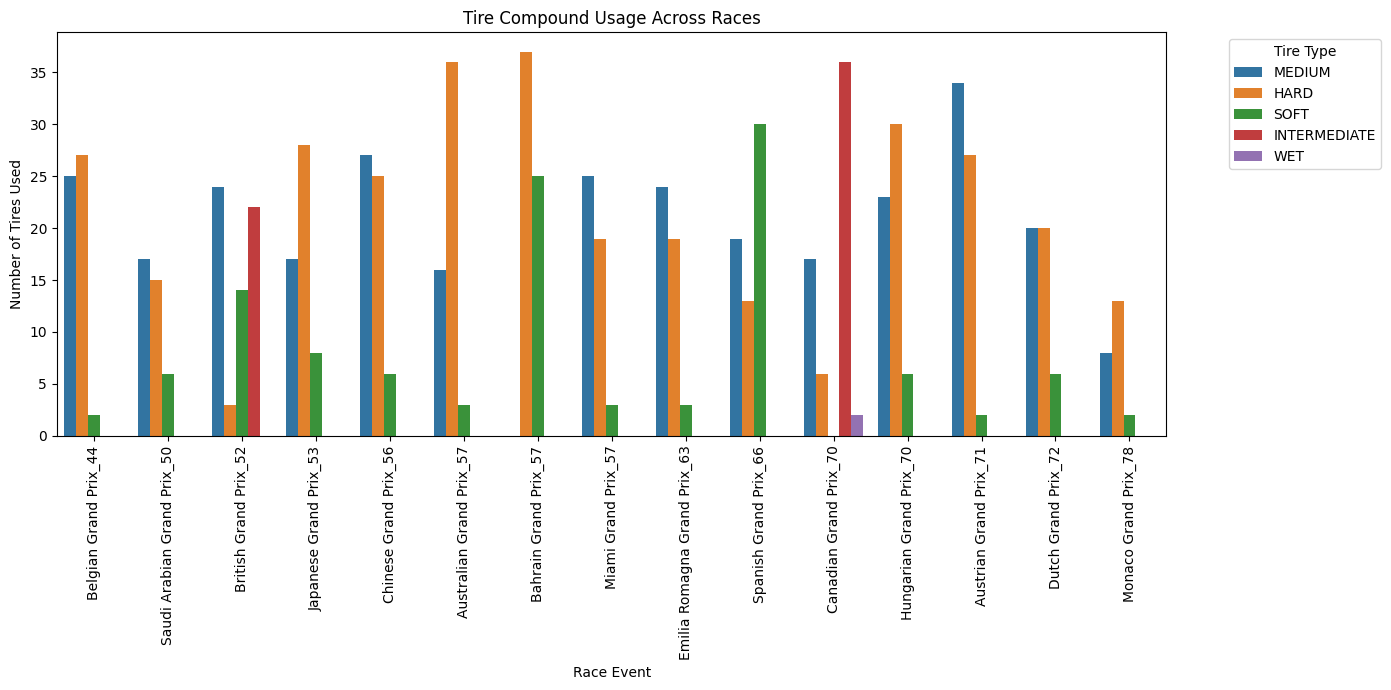

In [ ]:

compound_data = df3['Compound'].apply(pd.Series).fillna(0)
compound_data = compound_data.astype(int)

visualization_data = pd.concat([df3[['event_totla_lap', 'Stint']], compound_data], axis=1)

melted_data = visualization_data.melt(id_vars=['event_totla_lap', 'Stint'],
                                        value_vars=list(compound_data.columns),
                                        var_name='Tire Compound', value_name='Count')

plt.figure(figsize=(14, 7))
sns.barplot(data=melted_data, x='event_totla_lap', y='Count', hue='Tire Compound')
plt.title('Tire Compound Usage Across Races')
plt.xticks(rotation=90)
plt.xlabel('Race Event')
plt.ylabel('Number of Tires Used')
plt.legend(title='Tire Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

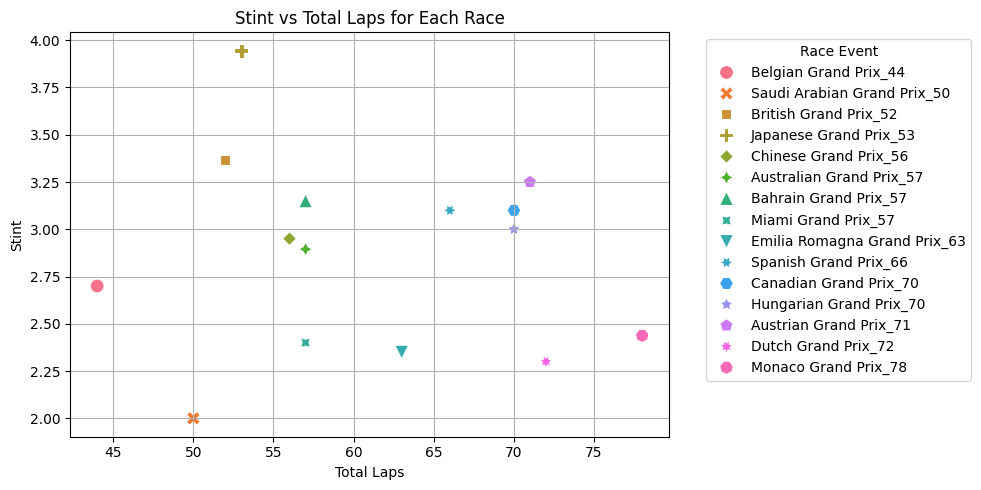

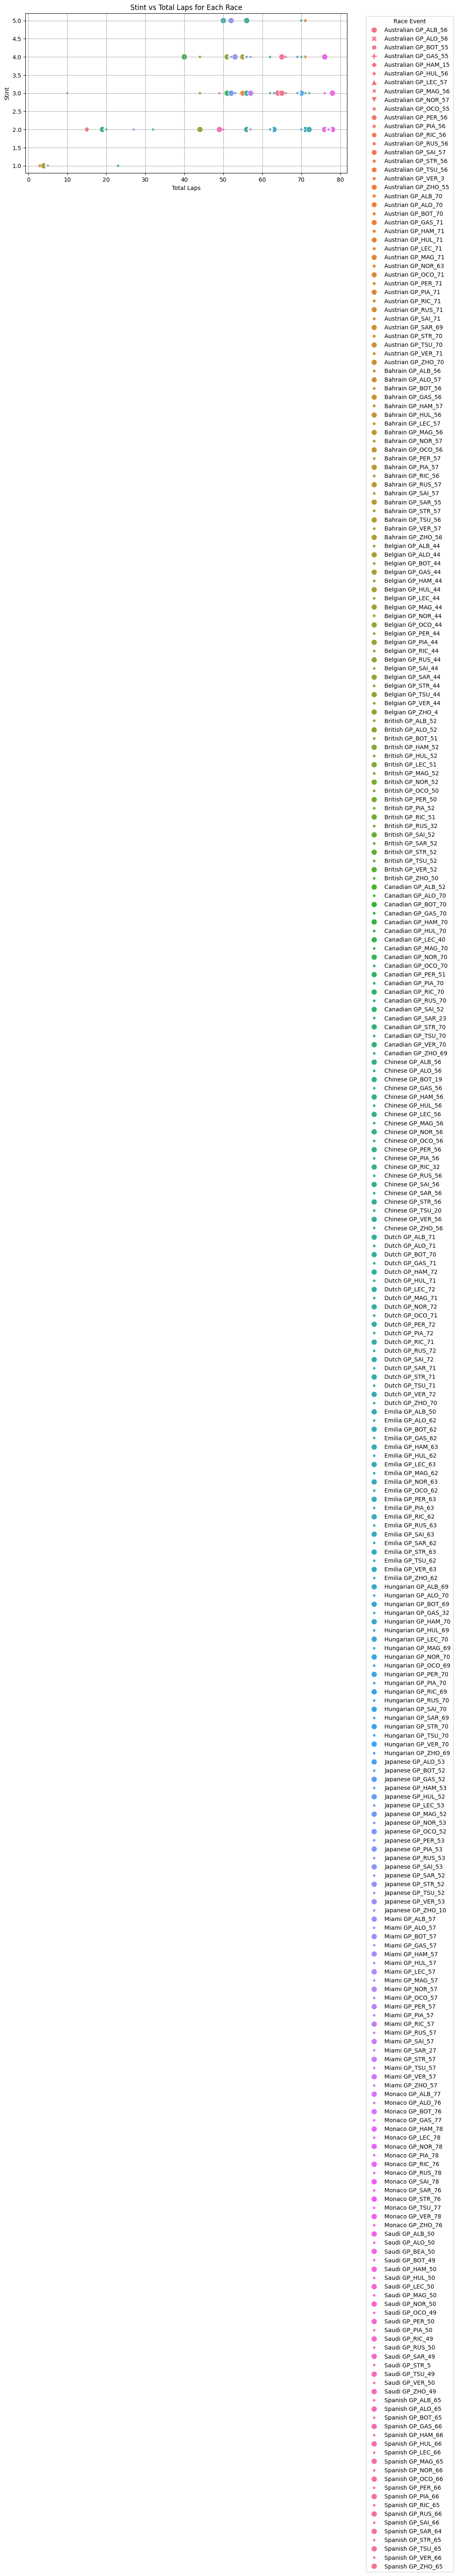

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df3, x='LapNumber', y='Stint', hue='event_totla_lap', style='event_totla_lap', s=100)
plt.title('Stint vs Total Laps for Each Race')
plt.xlabel('Total Laps')
plt.ylabel('Stint')
plt.grid(True)
plt.legend(title='Race Event', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# -----------------------------------per driver ---------------------------

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df2, x='LapNumber', y='Stint', hue='fullInfo', style='fullInfo', s=100)
plt.title('Stint vs Total Laps for Each Race')
plt.xlabel('Total Laps')
plt.ylabel('Stint')
plt.grid(True)
plt.legend(title='Race Event', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

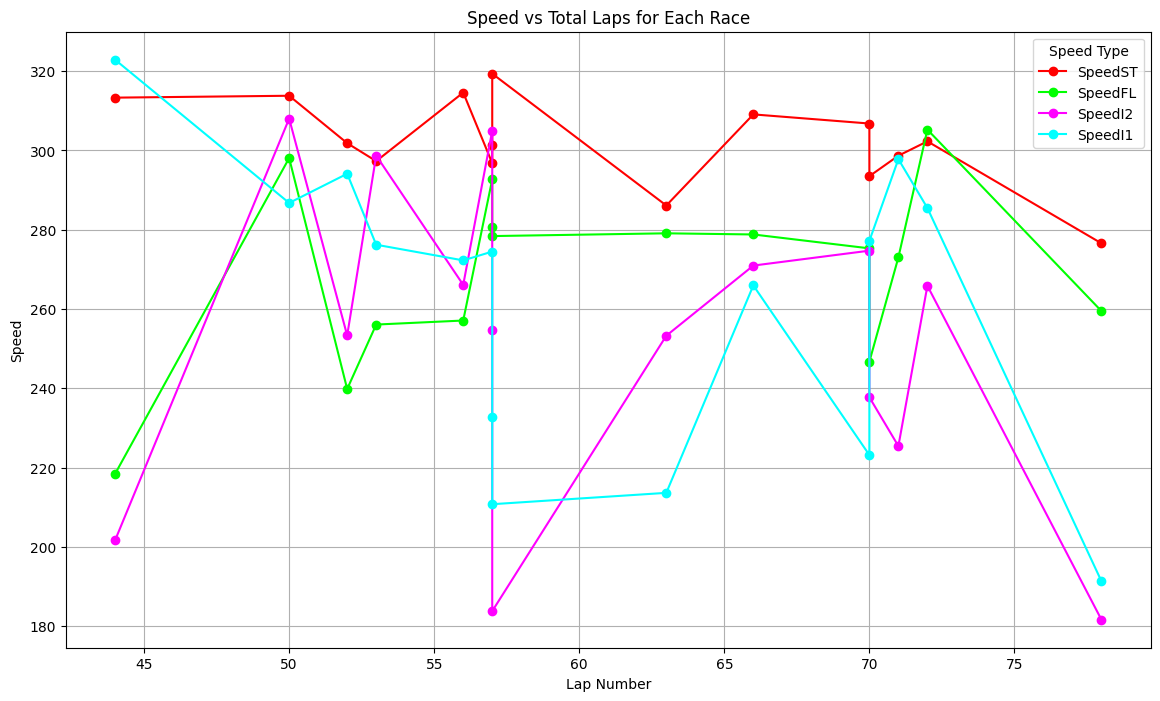

In [ ]:

lap_2024 =lap_2024[lap_2024['IsAccurate'] == True]
grouped_df = lap_2024.groupby(['EventName', 'Driver']).agg({

    'SpeedST' : 'mean',
    'SpeedFL': 'mean',
    'SpeedI2':'mean',
    'SpeedI1' : 'mean'

}).reset_index()
grouped_df

grouped_df2 = grouped_df.groupby(['EventName' ]).agg({
    'SpeedST' : 'mean',
    'SpeedFL': 'mean',
    'SpeedI2':'mean',
    'SpeedI1' : 'mean',
}).reset_index()


grouped_df2 [['LapNumber' , 'event_totla_lap']] = df3[['LapNumber', 'event_totla_lap']]
df = grouped_df2.sort_values(by='LapNumber', ascending=True)
df

plt.figure(figsize=(14, 8))

for i, col in enumerate(['SpeedST', 'SpeedFL', 'SpeedI2', 'SpeedI1']):
    plt.plot(df['LapNumber'], df[col], marker='o', label=col, color=list(colors.values())[i])

plt.title('Speed vs Total Laps for Each Race')
plt.xlabel('Lap Number')
plt.ylabel('Speed')
plt.legend(title='Speed Type')
plt.grid(True)
plt.show()


### **Relationship 6: weather and strategy**


In [ ]:
lap_2024 = pd.read_csv('ocean_data_challenge_F1_data/races_2024/lap_2024.csv')
result_2024 = pd.read_csv('ocean_data_challenge_F1_data/races_2024/result_2024.csv')
weather_2024 = pd.read_csv('ocean_data_challenge_F1_data/races_2024/weather_2024.csv')

deltaTime_cols = ['Time', 'LapTime', 'Sector1Time', 'Sector2Time', 'Sector3Time' ,
                  'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
                  'LapStartTime', 'PitOutTime','PitInTime' ]

lap_2024= convert_to_timedelta(lap_2024 , deltaTime_cols)

lap_2024 = conver_deltatime_to_second (lap_2024 , deltaTime_cols)
result_2024['event_driverAbr'] = result_2024['EventName'] + '_' + result_2024['Abbreviation']
lap_2024['event_driverAbr'] = lap_2024['EventName'] + '_' + lap_2024['Driver']

res_lap_2024 = pd.merge(result_2024, lap_2024, on=['event_driverAbr'])
we_res_lap_2024 = pd.merge(res_lap_2024, weather_2024, left_on=['EventName_x'] , right_on=['EventName'])
print(f'{orange}{bold} we_res_lap_2024 : {reset} {we_res_lap_2024.shape} ')


 we_res_lap_2024 :  (2609120, 75) 


In [ ]:
we_res_lap_2024 = we_res_lap_2024[we_res_lap_2024['IsAccurate'] == True]
df = we_res_lap_2024.groupby([ 'Driver','EventName' , 'Stint']).agg({
    'Compound': lambda x : (list(set(x))),
    'AirTemp' : 'mean',
    'Humidity' : 'mean',
    'Humidity' : 'mean',
    'Pressure' : 'mean',
    'TrackTemp' : 'mean',
    'WindSpeed' : 'mean',
    'Rainfall' : lambda x : (list(set(x))),
    'LapTime_in_sec' : 'mean'
}).reset_index()

df2 = df.groupby(['Driver','EventName' ]).agg({
    'Stint' :  'max',
    'Compound': lambda x : sum(x, []),
    'AirTemp' : 'mean',
    'Humidity' : 'mean',
    'Humidity' : 'mean',
    'Pressure' : 'mean',
    'TrackTemp' : 'mean',
    'WindSpeed' : 'mean',
    'Rainfall' : lambda x : sum(x, []),
    'LapTime_in_sec' : 'mean'

}).reset_index()

df3 = df2.groupby(['EventName']).agg({
    'Driver' : lambda x: (list(set(x))),
    'Stint' :  lambda x : (list(x)),
    'Compound': lambda x : sum(x, []),
    'AirTemp' : 'mean',
    'Humidity' : 'mean',
    'Humidity' : 'mean',
    'Pressure' : 'mean',
    'TrackTemp' : 'mean',
    'WindSpeed' : 'mean',
    'LapTime_in_sec' : 'mean',
    'Rainfall' : lambda x : sum(x, []),
}).reset_index()

df3

EventName  \
0       Australian Grand Prix   
1         Austrian Grand Prix   
2          Bahrain Grand Prix   
3          Belgian Grand Prix   
4          British Grand Prix   
5         Canadian Grand Prix   
6          Chinese Grand Prix   
7            Dutch Grand Prix   
8   Emilia Romagna Grand Prix   
9        Hungarian Grand Prix   
10        Japanese Grand Prix   
11           Miami Grand Prix   
12          Monaco Grand Prix   
13   Saudi Arabian Grand Prix   
14         Spanish Grand Prix   

                                               Driver  \
0   [GAS, BOT, RUS, ZHO, OCO, MAG, PER, ALB, HAM, ...   
1   [GAS, BOT, RUS, ZHO, OCO, MAG, PER, SAR, ALB, ...   
2   [GAS, BOT, RUS, ZHO, OCO, MAG, PER, SAR, ALB, ...   
3   [GAS, BOT, RUS, ZHO, OCO, MAG, PER, SAR, ALB, ...   
4   [BOT, RUS, ZHO, OCO, MAG, PER, SAR, ALB, HAM, ...   
5   [GAS, BOT, RUS, ZHO, OCO, MAG, PER, SAR, ALB, ...   
6   [GAS, BOT, RUS, ZHO, OCO, MAG, PER, SAR, ALB, ...   
7   [GAS, BOT, RUS, ZHO, OCO, MAG, PER, SAR, ALB, ...   
8   [GAS, BOT, RUS, ZHO, OCO, MAG, PER, SAR, ALB, ...   
9   [GAS, BOT, RUS, ZHO, OCO, MAG, PER, SAR, ALB, ...   
10  [GAS, BOT, HUL, RUS, ZHO, OCO, HAM, MAG, NOR, ...   
11  [GAS, BOT, RUS, ZHO, OCO, MAG, PER, SAR, ALB, ...   
12  [GAS, BOT, RUS, ZHO, HAM, STR, NOR, SAI, TSU, ...   
13  [BOT, RUS, ZHO, OCO, MAG, PER, SAR, ALB, HAM, ...   
14  [GAS, BOT, RUS, ZHO, OCO, MAG, PER, SAR, ALB, ...   

                                                Stint  \
0   [3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, ...   
1   [3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 5.0, 3.0, 3.0, ...   
2   [3.0, 3.0, 3.0, 4.0, 3.0, 4.0, 3.0, 3.0, 3.0, ...   
3   [3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, ...   
4   [3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 5.0, ...   
5   [3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 4.0, 5.0, 3.0, ...   
6   [3.0, 4.0, 2.0, 4.0, 3.0, 3.0, 2.0, 3.0, 2.0, ...   
7   [3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, ...   
8   [5.0, 4.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, ...   
9   [3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, ...   
10  [4.0, 4.0, 4.0, 4.0, 4.0, 3.0, 3.0, 4.0, 4.0, ...   
11  [3.0, 2.0, 3.0, 2.0, 2.0, 3.0, 2.0, 4.0, 2.0, ...   
12  [2.0, 2.0, 3.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, ...   
13  [2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, ...   
14  [3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ...   

                                             Compound    AirTemp   Humidity  \
0   [MEDIUM, HARD, HARD, HARD, MEDIUM, HARD, MEDIU...  20.622222  44.451389   
1   [MEDIUM, HARD, HARD, MEDIUM, MEDIUM, HARD, SOF...  29.425874  35.006993   
2   [SOFT, HARD, HARD, SOFT, HARD, HARD, SOFT, HAR...  18.227389  48.821656   
3   [MEDIUM, MEDIUM, HARD, MEDIUM, HARD, MEDIUM, H...  21.328467  49.583942   
4   [MEDIUM, INTERMEDIATE, MEDIUM, MEDIUM, INTERME...  15.770748  67.333333   
5   [INTERMEDIATE, INTERMEDIATE, MEDIUM, INTERMEDI...  17.797345  73.380531   
6   [MEDIUM, MEDIUM, HARD, MEDIUM, HARD, SOFT, MED...  18.639394  66.060606   
7   [MEDIUM, HARD, MEDIUM, MEDIUM, HARD, SOFT, HAR...  19.005882  60.960784   
8   [MEDIUM, MEDIUM, MEDIUM, MEDIUM, SOFT, HARD, M...  25.113986  48.426573   
9   [SOFT, HARD, HARD, SOFT, MEDIUM, HARD, MEDIUM,...  28.823871  46.922581   
10  [SOFT, MEDIUM, HARD, SOFT, HARD, HARD, HARD, M...  21.691160  43.430939   
11  [MEDIUM, HARD, SOFT, HARD, MEDIUM, SOFT, HARD,...  28.522000  59.006667   
12  [HARD, MEDIUM, MEDIUM, HARD, MEDIUM, MEDIUM, H...  21.596500  63.990000   
13  [MEDIUM, HARD, MEDIUM, HARD, SOFT, HARD, SOFT,...  25.528082  62.335616   
14  [MEDIUM, SOFT, SOFT, SOFT, MEDIUM, HARD, SOFT,...  24.132468  63.441558   

       Pressure  TrackTemp  WindSpeed  LapTime_in_sec  \
0   1020.601389  38.402083   0.953472       82.665071   
1    932.862937  46.420979   1.667832       71.041554   
2   1017.185987  23.652866   0.785987       97.153810   
3    978.096350  42.267153   1.683212      109.427039   
4    992.126531  27.670068   1.348299       96.288073   
5    996.197345  24.569912   1.169912       86.660263   
6

In [ ]:
df3.columns

Index(['EventName', 'Driver', 'Stint', 'Compound', 'AirTemp', 'Humidity',
       'Pressure', 'TrackTemp', 'WindSpeed', 'LapTime_in_sec', 'Rainfall',
       'mean_Stint'],
      dtype='object')

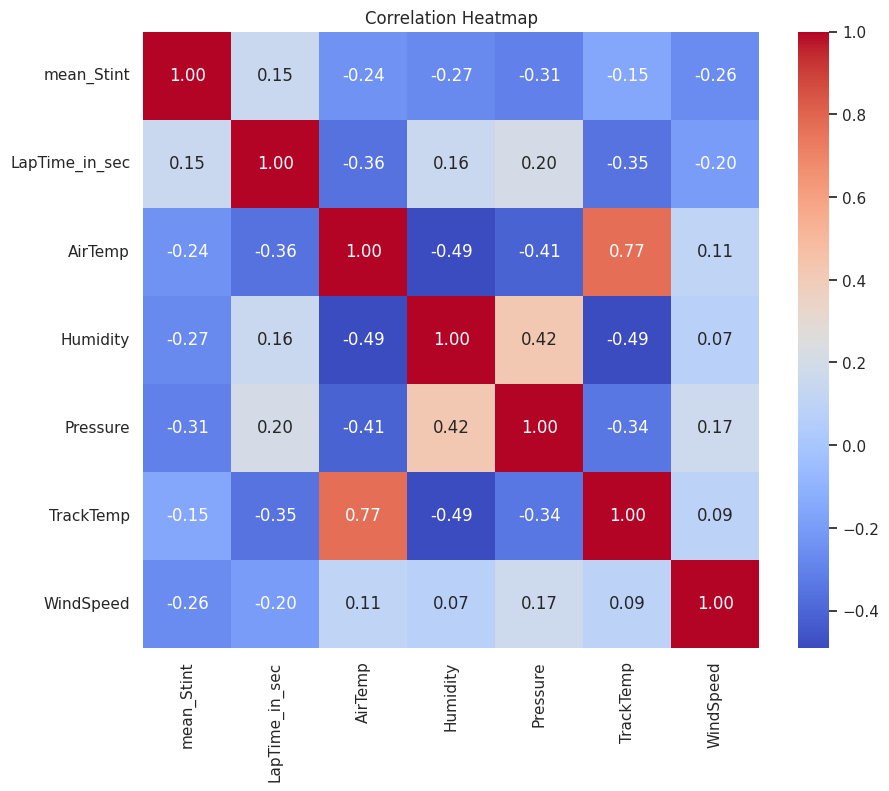

In [ ]:
df3['mean_Stint'] = df3['Stint'].apply(lambda x: sum(x) / len(x))
correlation_data = df3[['mean_Stint', 'LapTime_in_sec', 'AirTemp', 'Humidity', 'Pressure', 'TrackTemp', 'WindSpeed']]

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

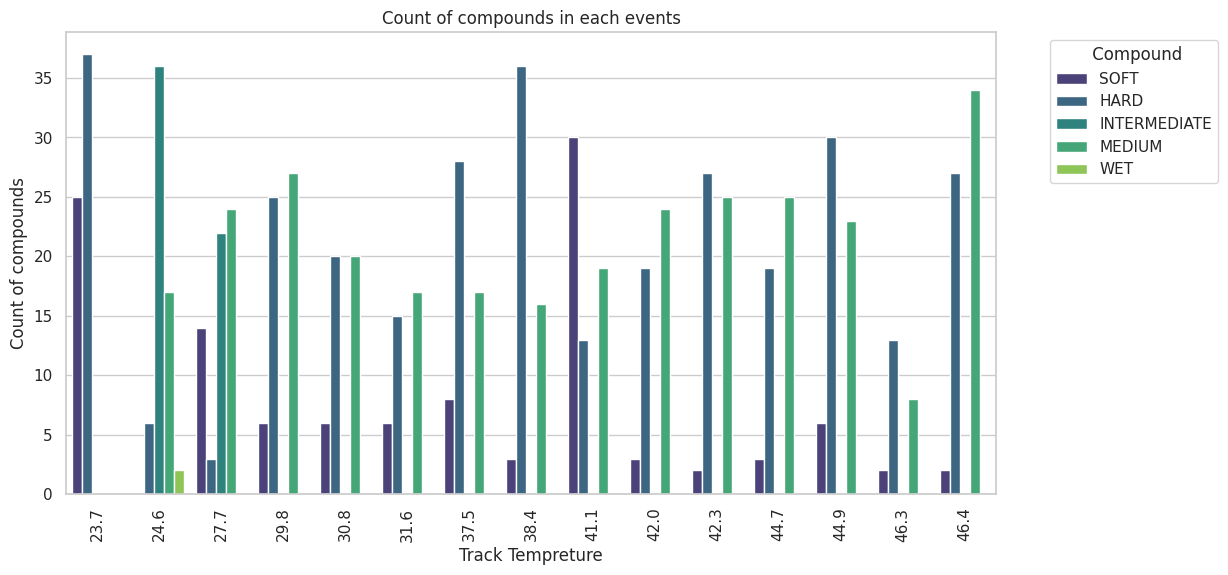

In [ ]:
df3 = df3.sort_values(by='TrackTemp', ascending=True)
df_exploded = df3.explode('Compound')
df_exploded['TrackTemp'] = df_exploded['TrackTemp'].round(1)

plt.figure(figsize=(12, 6))
sns.countplot(data=df_exploded, x='TrackTemp', hue='Compound', palette='viridis')
plt.title('Count of compounds in each events')
plt.xlabel('Track Tempreture')
plt.ylabel('Count of compounds')
plt.xticks(rotation=90)

plt.legend(title=' Compound', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


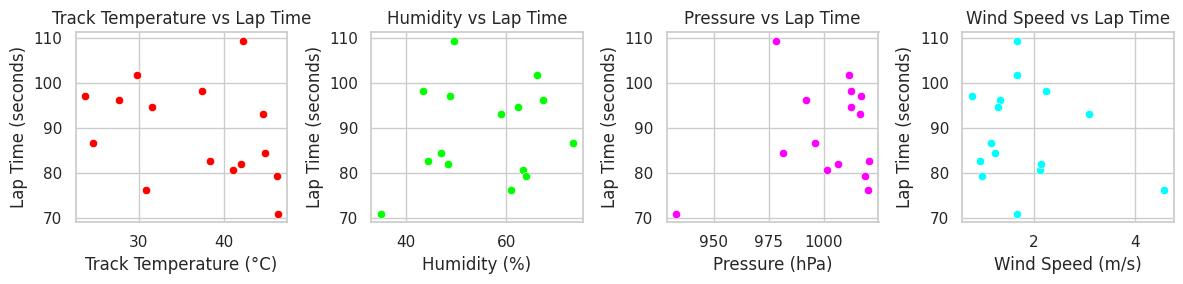

In [ ]:
fig, axs = plt.subplots(1,4, figsize=(12, 3))

# Scatter plot for Track Temperature vs Lap Time
sns.scatterplot(x='TrackTemp', y='LapTime_in_sec', data=df3,  color = list(colors.values())[0], ax=axs[0])
axs[0].set_title('Track Temperature vs Lap Time')
axs[0].set_xlabel('Track Temperature (°C)')
axs[0].set_ylabel('Lap Time (seconds)')
axs[0].grid(True)

# Scatter plot for Humidity vs Lap Time
sns.scatterplot(x='Humidity', y='LapTime_in_sec', data=df3,  color = list(colors.values())[1], ax=axs[1])
axs[1].set_title('Humidity vs Lap Time')
axs[1].set_xlabel('Humidity (%)')
axs[1].set_ylabel('Lap Time (seconds)')
axs[1].grid(True)

# Scatter plot for Pressure vs Lap Time
sns.scatterplot(x='Pressure', y='LapTime_in_sec', data=df3,  color = list(colors.values())[2], ax=axs[2])
axs[2].set_title('Pressure vs Lap Time')
axs[2].set_xlabel('Pressure (hPa)')
axs[2].set_ylabel('Lap Time (seconds)')
axs[2].grid(True)

# Scatter plot for Wind Speed vs Lap Time
sns.scatterplot(x='WindSpeed', y='LapTime_in_sec', data=df3,  color = list(colors.values())[3], ax=axs[3])
axs[3].set_title('Wind Speed vs Lap Time')
axs[3].set_xlabel('Wind Speed (m/s)')
axs[3].set_ylabel('Lap Time (seconds)')
axs[3].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

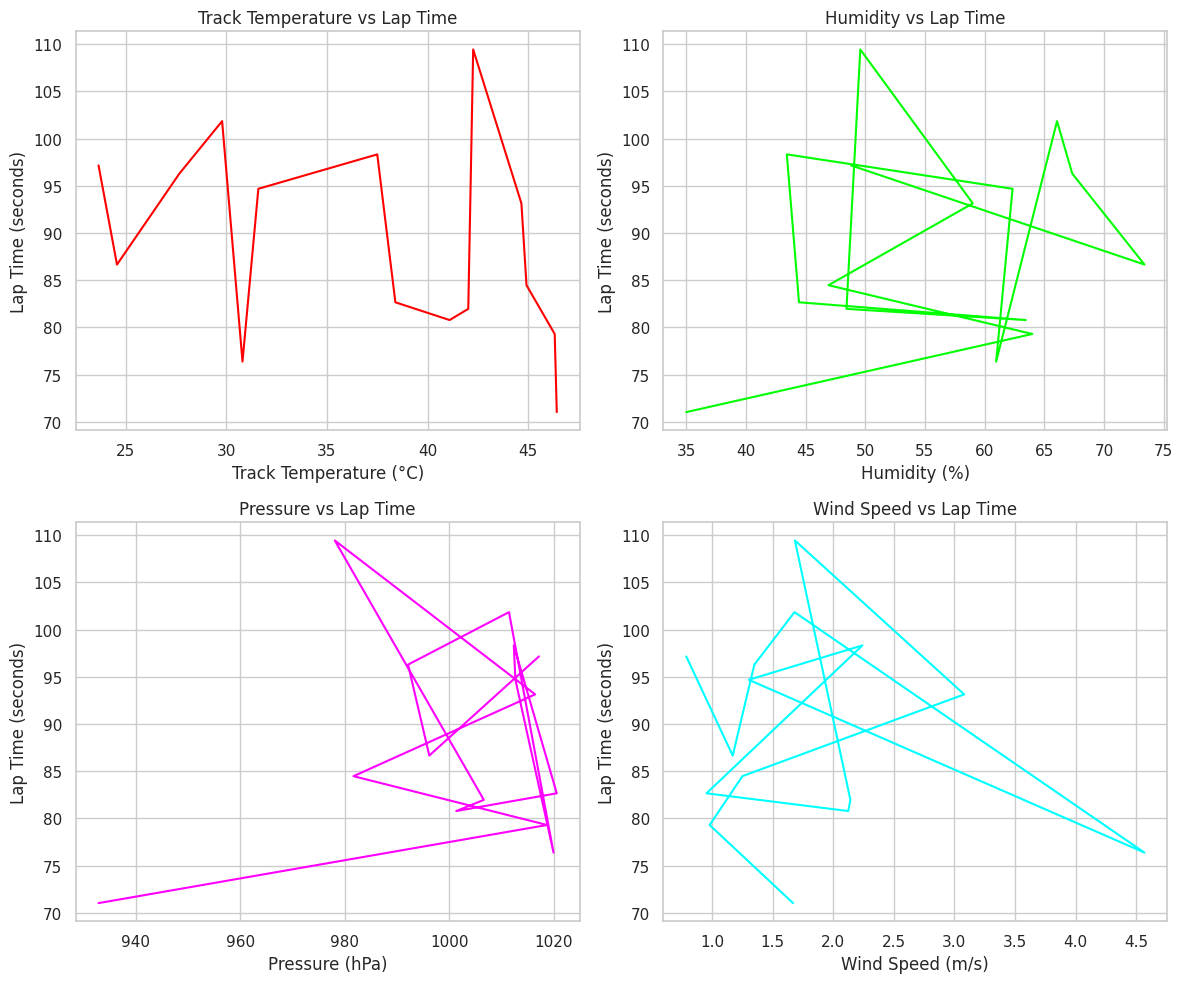

In [ ]:

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].plot(df3['TrackTemp'], df3['LapTime_in_sec'], color = list(colors.values())[0],)
axs[0, 0].set_title('Track Temperature vs Lap Time')
axs[0, 0].set_xlabel('Track Temperature (°C)')
axs[0, 0].set_ylabel('Lap Time (seconds)')
axs[0, 0].grid(True)

axs[0, 1].plot(df3['Humidity'], df3['LapTime_in_sec'],  color = list(colors.values())[1],)
axs[0, 1].set_title('Humidity vs Lap Time')
axs[0, 1].set_xlabel('Humidity (%)')
axs[0, 1].set_ylabel('Lap Time (seconds)')
axs[0, 1].grid(True)

axs[1, 0].plot(df3['Pressure'], df3['LapTime_in_sec'], color = list(colors.values())[2], )
axs[1, 0].set_title('Pressure vs Lap Time')
axs[1, 0].set_xlabel('Pressure (hPa)')
axs[1, 0].set_ylabel('Lap Time (seconds)')
axs[1, 0].grid(True)

axs[1,1].plot(df3['WindSpeed'],df3['LapTime_in_sec'],color = list(colors.values())[3], )
axs[1, 1].set_title('Wind Speed vs Lap Time')
axs[1, 1].set_xlabel('Wind Speed (m/s)')
axs[1, 1].set_ylabel('Lap Time (seconds)')
axs[1, 1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

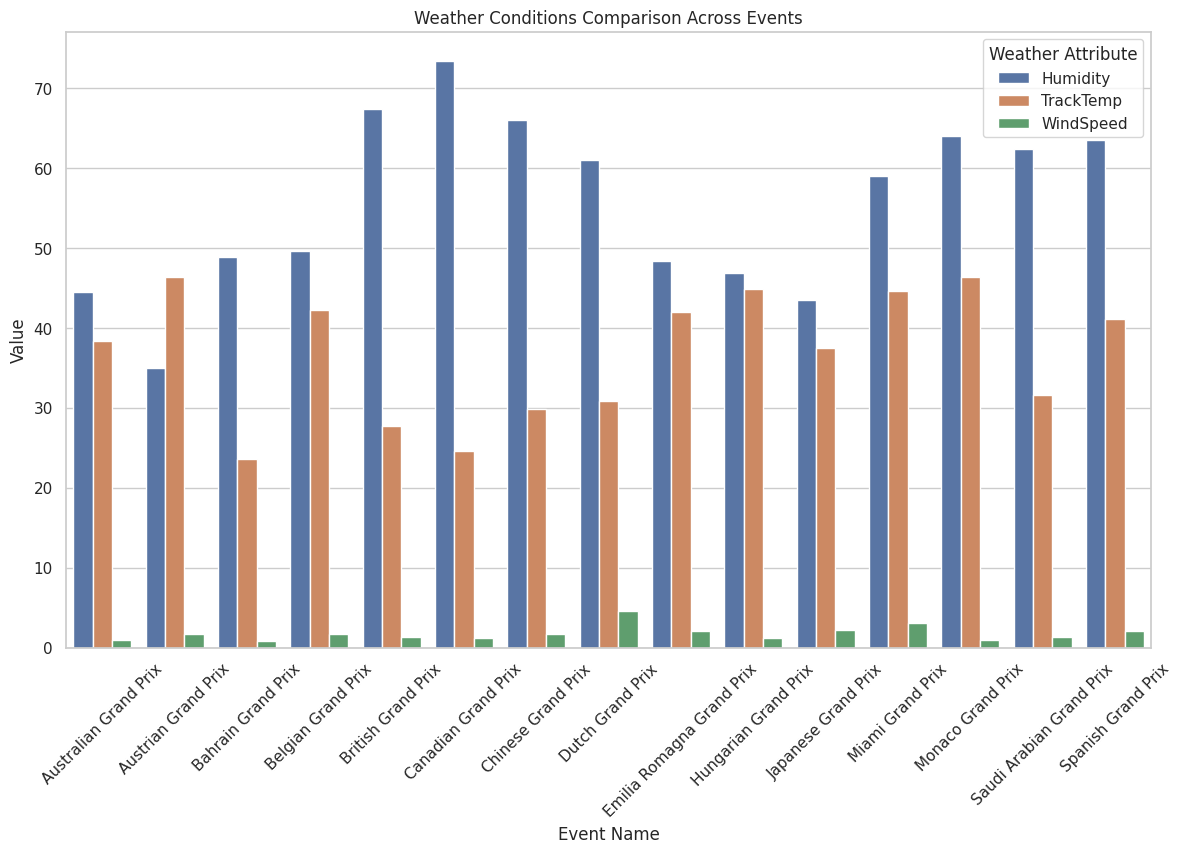

In [ ]:
# Set the style for the plot
sns.set(style="whitegrid")

# Melt the DataFrame for easier plotting
df_melted = df3.melt(id_vars='EventName', value_vars=['Humidity', 'TrackTemp', 'WindSpeed'],
                    var_name='WeatherAttribute', value_name='Value')

# Create a bar plot
plt.figure(figsize=(14,8))
sns.barplot(x='EventName', y='Value', hue='WeatherAttribute', data=df_melted)

# Rotate x labels for better readability
plt.xticks(rotation=45)
plt.title('Weather Conditions Comparison Across Events')
plt.ylabel('Value')
plt.xlabel('Event Name')

# Show the legend
plt.legend(title='Weather Attribute')


### **Bonus Question** 5 points

Examine the relationship between attributes you consider significant in a race of your choice. Explain your reasoning for selecting these attributes and whether the race holds particular relevance.


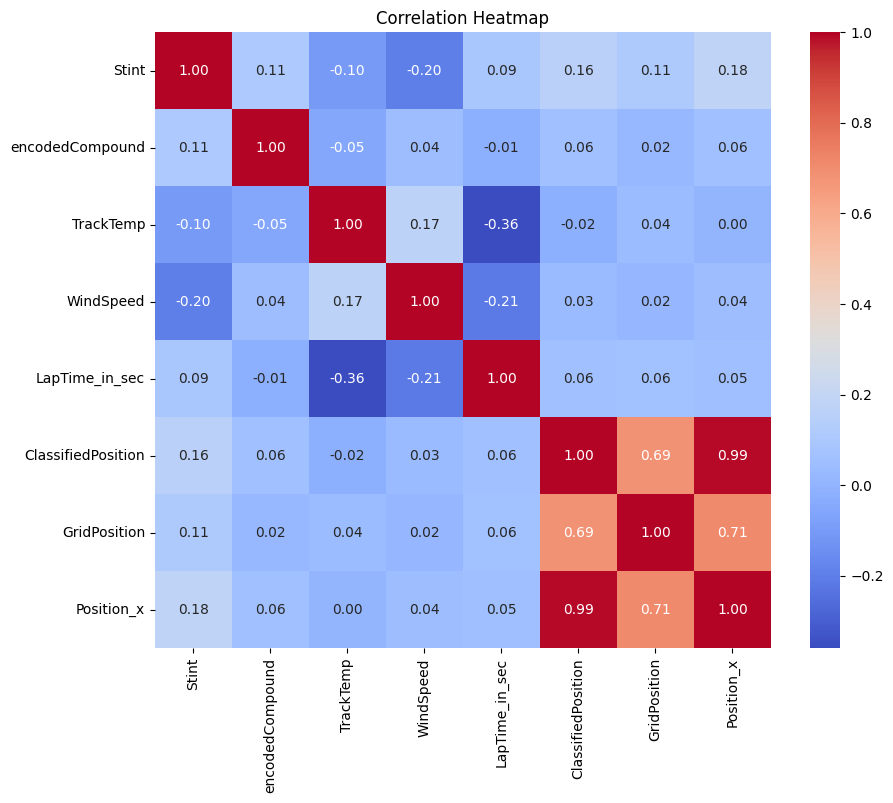

In [ ]:
we_res_lap_2024 = we_res_lap_2024[we_res_lap_2024['IsAccurate'] == True]
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

we_res_lap_2024['encodedCompound'] = label_encoder.fit_transform(we_res_lap_2024['Compound'])

df = we_res_lap_2024.groupby([ 'EventName', 'Driver',  'Stint']).agg({
    'encodedCompound': 'first',
    'TrackTemp' : 'mean',
    'WindSpeed' : 'mean',
    'ClassifiedPosition' : 'min',
    'GridPosition' :'min',
    'Position_x':'min',
    'LapTime_in_sec' : 'mean',
    'SpeedFL' :'mean'
}).reset_index()

df2 = df.groupby(['Driver','EventName' ]).agg({
    'Stint' :  'max',
    'encodedCompound': list,
    'TrackTemp' : 'mean',
    'WindSpeed' : 'mean',
    'LapTime_in_sec' : 'mean',
    'ClassifiedPosition' :  'min',
    'GridPosition' : 'min',
    'Position_x':  'min',
})

df2 = df2.explode('encodedCompound')

df2['ClassifiedPosition']=df2['ClassifiedPosition'].replace('R', '22')
df2['ClassifiedPosition']=df2['ClassifiedPosition'].replace('D', '23')


correlation_matrix = df2.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()